In [1]:
from controller import *
from utils import *

Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


In [2]:
concept1 = "penguin"
concept2 = "giraffe"
c2_weight = 0.55

options = {
    "seed": 255,
    "steps": 50,
    "n_iter": 1,
    "n_samples": 2,
#     "sampler": "k_dpm_2_a",
    "sampler": "ddim",
    "scale": 10,
}

c1_emb = c.encode_prompt(concept1)
c2_emb = c.encode_prompt(concept2)
c1_c2_emb = c.encode_prompt(concept1 + " " + concept2)
c2_c1_emb = c.encode_prompt(concept2 + " " + concept1)
with_percent = c.encode_prompt(f"{1-c2_weight:.0%} {concept1}, {c2_weight:.0%} {concept2}")
c1_comma_c2 = c.encode_prompt(concept1 + ", " + concept2)
c2_comma_c1 = c.encode_prompt(concept2 + ", " + concept1)
c1_comb_c2 = c.encode_prompt(concept1 + " combined with " + concept2)

In [3]:
slerp_raw_emb = slerp(c2_weight, c1_emb, c2_emb)
slerp_norm_emb = renormalize_clip_embedding(slerp_raw_emb)
linear_emb = (1-c2_weight) * c1_emb + c2_weight * c2_emb

In [4]:
images = c.txt2imgcls(slerp_raw_emb, extract_intermediates=True, **options)["intermediates"]

Global seed set to 255


Data shape for DDIM sampling is (2, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.45it/s]



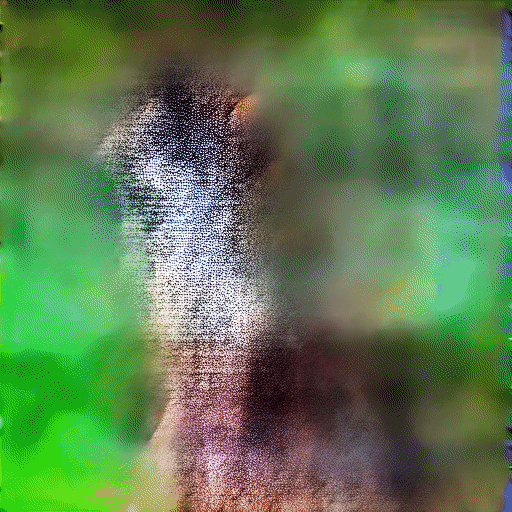

In [5]:
images[0].displaygif()

In [ ]:
c.txt2imgcls(slerp_norm_emb, **options)["grid"]

In [ ]:
c.txt2imgcls(linear_emb, **options)["grid"]

In [ ]:
c.txt2imgcls(c1_c2_emb, **options)["grid"]

In [ ]:
c.txt2imgcls(c2_c1_emb, **options)["grid"]

In [ ]:
c.txt2imgcls(with_percent, **options)["grid"]

In [ ]:
c.txt2imgcls(c1_comma_c2, **options)["grid"]

In [ ]:
c.txt2imgcls(c2_comma_c1, **options)["grid"]

In [ ]:
c.txt2imgcls(c1_comb_c2, **options)["grid"]